Este projeto visa a aplicação de modelos de Regressão.

Utilizando um dataset com informações sobre empregos voltados a dados, será construído, treinado e otimizado um modelo de Regressão parqa previsão de salários de empregos voltados a dados.

* Bibliotecas:

In [351]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

Dataset:

In [314]:
data = pd.read_csv('ds_salaries.csv')
data_backup = data.copy()

data.head()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [315]:
data.info()
data = data.drop(columns='id', axis=1)

print(f'\n Dataset contém {data.shape[0]} linhas e {data.shape[1]} colunas')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB

 Dataset contém 607 linhas e 11 colunas


In [316]:

# Obtendo os índices referentes as colunas com variáveis numéricas e categóricas:

data_n = data.select_dtypes(exclude='object')
index_num = data_n.columns

data_c = data.select_dtypes('object')
index_cat = data_c.columns

print(f'Número de variáveis numéricas: {data[index_num].shape[1]} \nNúmero de variáveis categóricas: {data[index_cat].shape[1]}')

Número de variáveis numéricas: 4 
Número de variáveis categóricas: 7


O dataset contém 607 entradas e não possui dados faltantes.

In [317]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


Podemos notar alguns possíveis outliers na nossa variável alvo (salary in usd).

In [318]:
# Visualizando os salários anuais maiores que 400.000,00 dólares:

data.loc[data['salary_in_usd'] > 400000]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
33,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
63,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
97,2021,MI,FT,Financial Data Analyst,450000,USD,450000,US,100,US,L
157,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
225,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
252,2021,EX,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L
523,2022,SE,FT,Data Analytics Lead,405000,USD,405000,US,100,US,L


In [319]:
# Removendo a linha com salário de 600.000,00 dólares, visto que este exemplo é um outlier.

data = data[data['salary_in_usd'] != 600000]

In [320]:
# Visualizando os salários anuais menores que 20.000,00 dólares:

data.loc[data['salary_in_usd'] < 20000]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
15,2020,MI,FT,Data Analyst,8000,USD,8000,PK,50,PK,L
18,2020,EN,FT,Data Science Consultant,423000,INR,5707,IN,50,IN,M
21,2020,MI,FT,Product Data Analyst,450000,INR,6072,IN,100,IN,L
38,2020,EN,FT,Data Analyst,10000,USD,10000,NG,100,NG,S
45,2020,EN,PT,ML Engineer,14000,EUR,15966,DE,100,DE,S
50,2020,EN,FT,Data Analyst,450000,INR,6072,IN,0,IN,S
77,2021,MI,PT,3D Computer Vision Researcher,400000,INR,5409,IN,50,IN,M
92,2021,MI,FT,Lead Data Analyst,1450000,INR,19609,IN,100,IN,L
96,2021,EN,PT,AI Scientist,12000,USD,12000,BR,100,US,S
113,2021,EN,PT,AI Scientist,12000,USD,12000,PK,100,US,M


Podemos notar que a coluna apresenta erros de entrada, visto que alguns salários são mensais. Em especial os salários pagos em Rupias indianas (INR) apresentam um valor muito baixo, o que pode prejudicar o modelo.

In [321]:
# Removendo entradas com salários em rupias indianas.

data = data[data['salary_currency'] != 'INR']

Os demais valores serão multiplicados por 12, afim de obter o real valor dos salários anuais.

In [322]:
data['salary_in_usd'] = data['salary_in_usd'].apply(lambda x: x if x > 20000 else x*12)

<Axes: xlabel='salary_in_usd', ylabel='Count'>

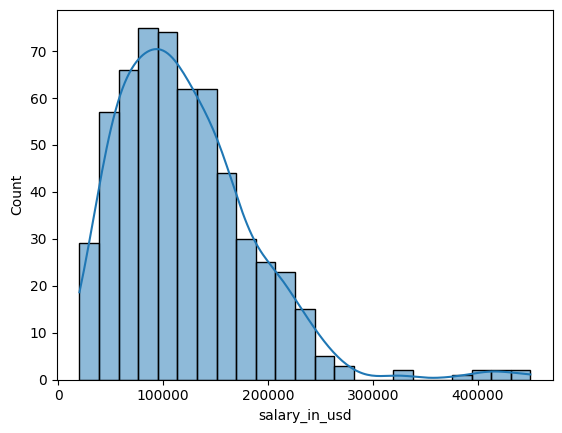

In [323]:
# Distribuição dos salários:

sns.histplot(data=data, x='salary_in_usd', kde=True)

Visto que não será necessário fazer uma limpeza no dataset, continuaremos com uma análise exploratório e feature engeneering.

In [324]:
data['remote_ratio'].value_counts()

remote_ratio
100    368
0      120
50      91
Name: count, dtype: int64

C:\Users\Daniels\AppData\Local\Temp\ipykernel_5664\1954287471.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Remoto', 'Hibrido', 'Presencial'])


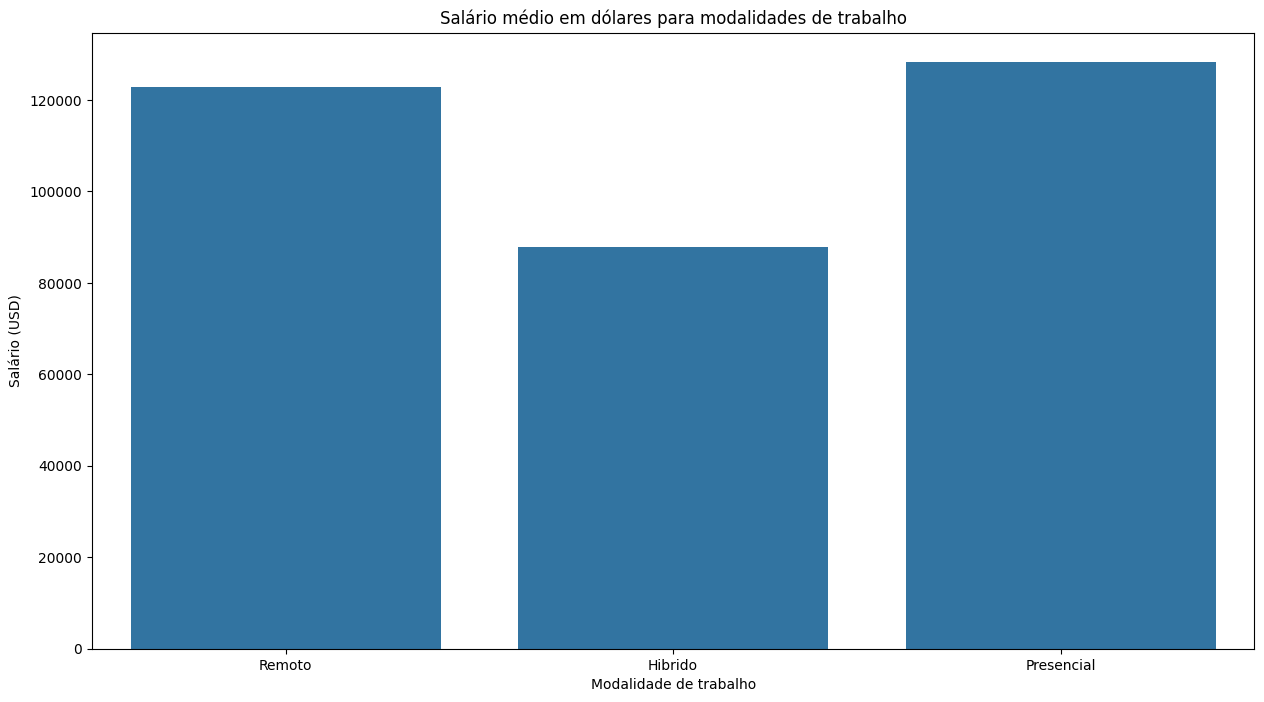

In [325]:
# Visualizando a relação do salário médio com a modalidade do trabalho:

g1 = data.groupby('remote_ratio')['salary_in_usd'].mean()

plt.figure(figsize=(15,8))

sns.barplot(x=g1.index, y=g1)

plt.title('Salário médio em dólares para modalidades de trabalho')
plt.ylabel('Salário (USD)')
plt.xlabel('Modalidade de trabalho')

plt.gca().set_xticklabels(['Remoto', 'Hibrido', 'Presencial'])

plt.show()

Os empregos presenciais apresentam a maior média salarial, seguido do trabalho remoto.

In [326]:
# Para melhor adequar os dados ao modelo, vamos criar novas colunas no dataset:

data['remote work'] = data['remote_ratio'].apply(lambda x:1 if x == 0 else 0)
data['hybrid'] = data['remote_ratio'].apply(lambda x:1 if x == 50 else 0)
data['in-office work'] = data['remote_ratio'].apply(lambda x:1 if x == 100 else 0)

data = data.drop(columns='remote_ratio', axis=1)

In [327]:
data['experience_level'].value_counts()

experience_level
SE    275
MI    202
EN     78
EX     24
Name: count, dtype: int64

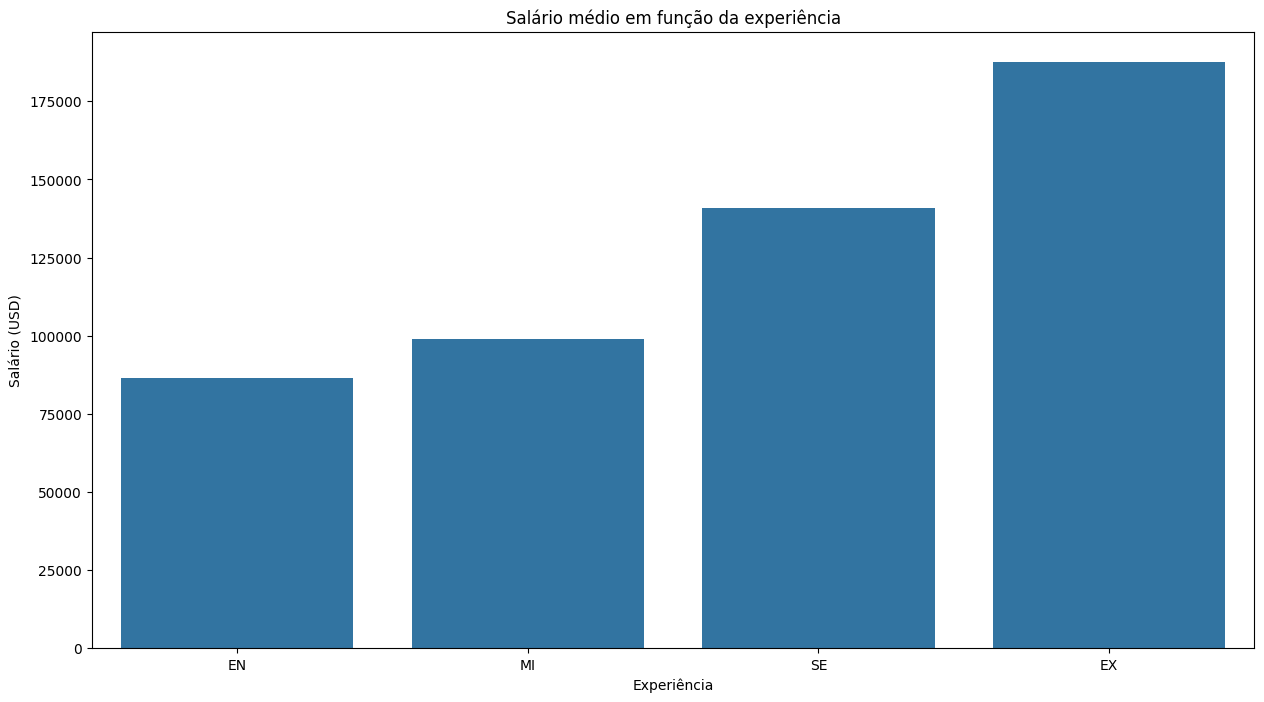

In [328]:
# Visualizando a relação do salário médio com a experiência:

g2 = data.groupby('experience_level')['salary_in_usd'].mean().sort_values()

plt.figure(figsize=(15,8))

sns.barplot(x=g2.index, y=g2)

plt.title('Salário médio em função da experiência')
plt.ylabel('Salário (USD)')
plt.xlabel('Experiência')

plt.show()


Segundo a documentação do dataset:

EN - Entry-level

MI - Mid-level

SE - Senior-level

EX - referencia anos de experiência no campo.

Podemos notar um crescimento aparentemente linear do salário médio em relação aos cargos.

In [329]:
# De forma análoga a variável anterior, vamos criar novas colunas:

data['entry'] = data['experience_level'].apply(lambda x:1 if x == 'EN' else 0)
data['mid'] = data['experience_level'].apply(lambda x:1 if x == 'MI' else 0)
data['senior'] = data['experience_level'].apply(lambda x:1 if x == 'SE' else 0)
data['expirence'] = data['experience_level'].apply(lambda x:1 if x == 'EX' else 0)

data = data.drop(columns='experience_level', axis=1)

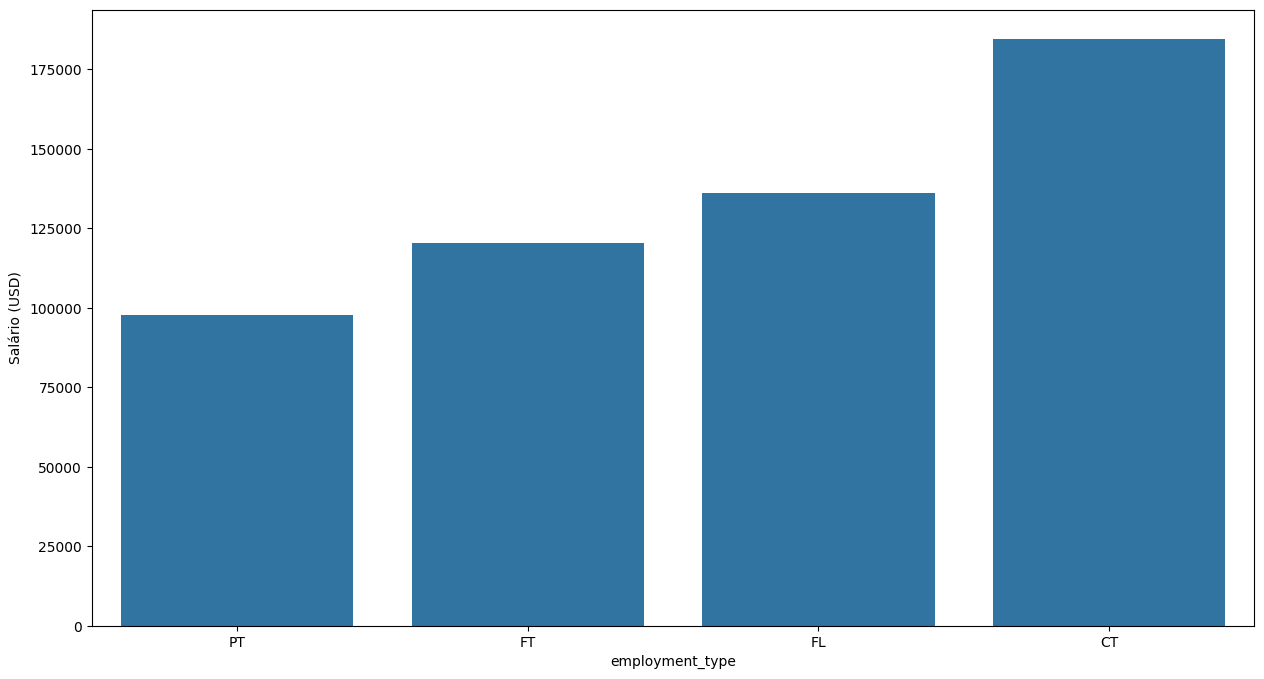

In [330]:
# Visualizando a relação do salário médio com a coluna 'employment_type':

g3 = data.groupby('employment_type')['salary_in_usd'].mean().sort_values()

plt.figure(figsize=(15,8))

sns.barplot(x=g3.index, y=g3)

plt.ylabel('Salário (USD)')

plt.show()


A documentação não cita detalhes sobre esta coluna, mas é facil ver que o salário médio esta relacionado com cada classe desta coluna.

In [331]:
data = pd.get_dummies(data, columns=['employment_type'], dtype=int)

C:\Users\Daniels\AppData\Local\Temp\ipykernel_5664\3531338973.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Pequena', 'Média', 'Grande'])


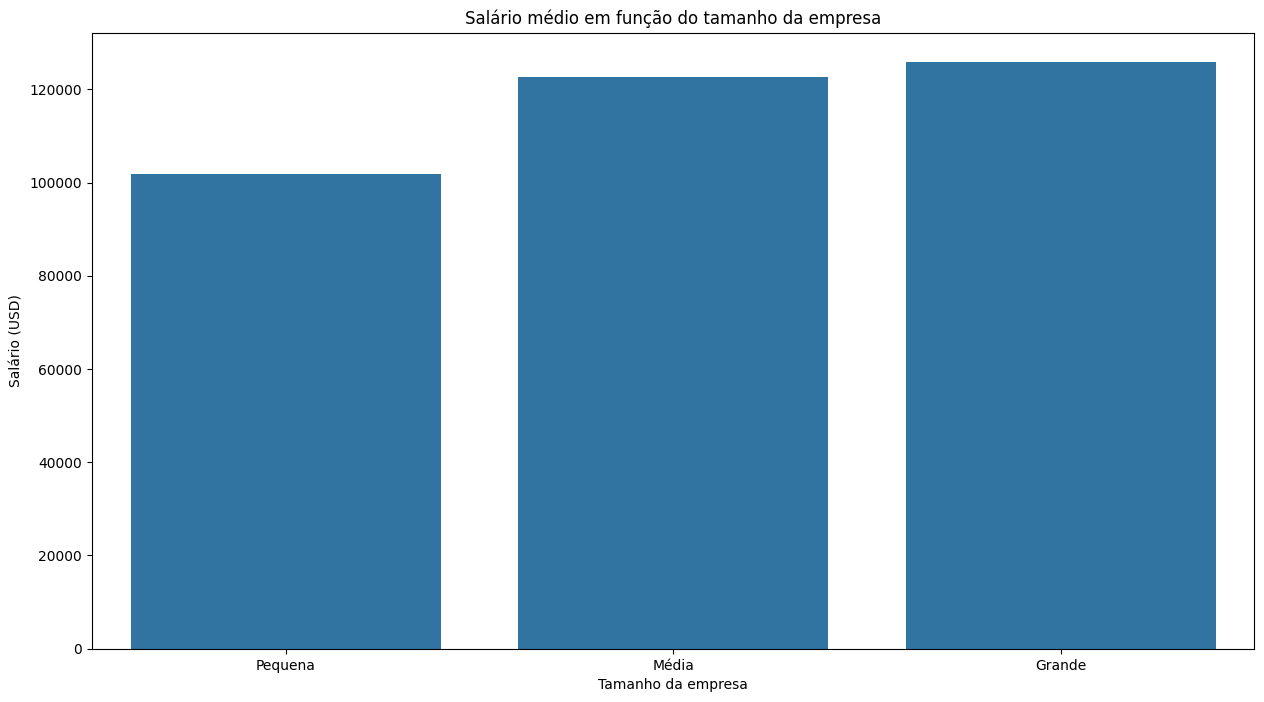

In [332]:
# Visualizando a relação do salário médio com o tamanho da empresa:

g4 = data.groupby('company_size')['salary_in_usd'].mean().sort_values()

plt.figure(figsize=(15,8))

sns.barplot(x=g4.index, y=g4)

plt.title('Salário médio em função do tamanho da empresa')
plt.ylabel('Salário (USD)')
plt.xlabel('Tamanho da empresa')

plt.gca().set_xticklabels(['Pequena', 'Média', 'Grande'])

plt.show()


Pequenas empresas tendem a pagar um salário mais baixo.

In [333]:
data = pd.get_dummies(data, columns=['company_size'], dtype=int)

In [334]:
data['job_title'].nunique()

48

Existem muitos titulos distintos para os trabalhos, mas podemos resumi-los em poucas classes, para diminuir a cardinalidade da variável.

In [335]:
data['job_title'].value_counts()

job_title
Data Scientist                              134
Data Engineer                               130
Data Analyst                                 96
Machine Learning Engineer                    39
Research Scientist                           16
Data Architect                               11
Data Science Manager                         10
Machine Learning Scientist                    8
Principal Data Scientist                      7
Director of Data Science                      7
Data Analytics Manager                        7
BI Data Analyst                               6
Lead Data Engineer                            6
Data Science Consultant                       6
ML Engineer                                   6
AI Scientist                                  6
Computer Vision Engineer                      6
Data Engineering Manager                      5
Applied Data Scientist                        5
Big Data Engineer                             5
Head of Data                  

In [336]:
data['job_data_scientist'] = data['job_title'].apply(lambda x:1 if 'Data Scientist' in x else 0)
data['job_data_engineer'] = data['job_title'].apply(lambda x:1 if 'Data Engineer' in x else 0)
data['job_data_analyst'] = data['job_title'].apply(lambda x:1 if 'Data Analyst' in x else 0)
data['job_data_architect'] = data['job_title'].apply(lambda x:1 if 'Data Architect' in x else 0)
data['job_data_ml_engineer'] = data['job_title'].apply(lambda x:1 if 'Machine Learning Engineer' or 'ML Engineer' in x else 0)
data['job_data__manager'] = data['job_title'].apply(lambda x: 1 if 'Manager' or 'Head' or 'Principal' or 'Lead' in x else 0)
data['job_data__research'] = data['job_title'].apply(lambda x: 1 if 'Research' in x else 0)
data['job_data__director'] = data['job_title'].apply(lambda x: 1 if 'Director' in x else 0)

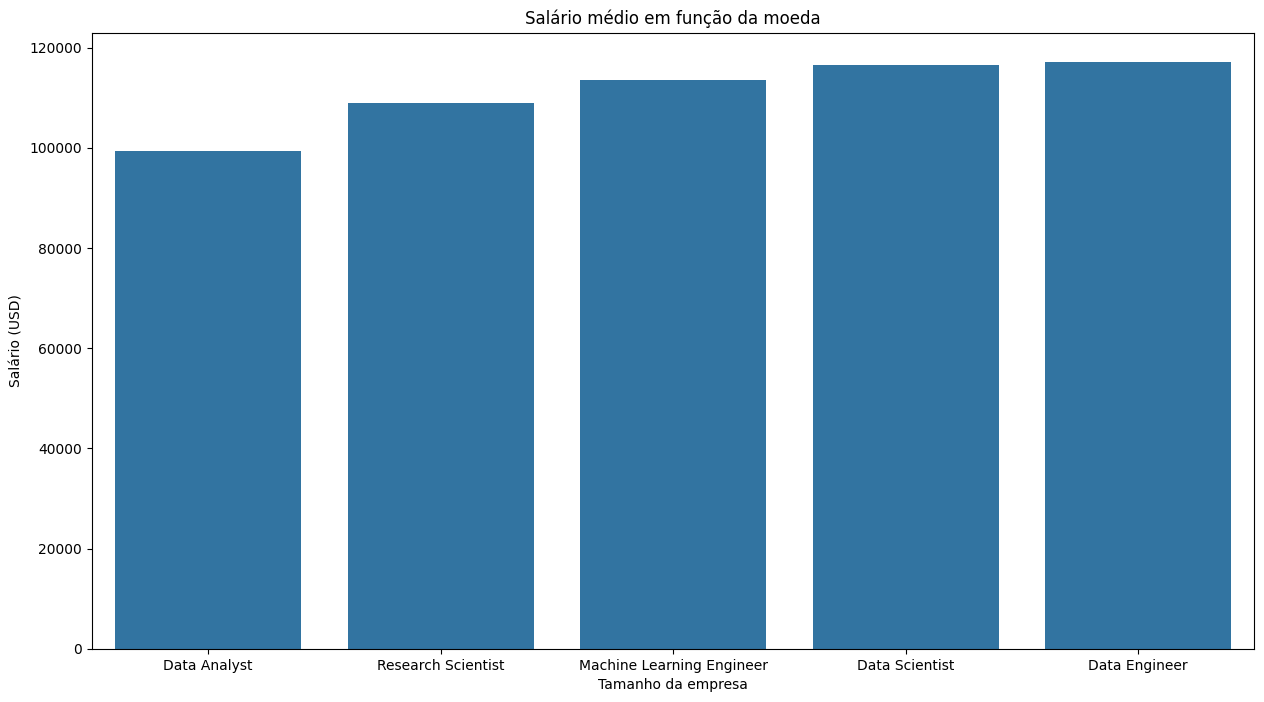

In [337]:
# Visualizando a relação do salário com os títulos da posição ocupada:

top_5_job_titles = data['job_title'].value_counts().head(5).index
filtered_data = data[data['job_title'].isin(top_5_job_titles)]

g5 = filtered_data.groupby('job_title')['salary_in_usd'].mean().sort_values()

plt.figure(figsize=(15,8))

sns.barplot(x=g5.index, y=g5)

plt.title('Salário médio em função da moeda')
plt.ylabel('Salário (USD)')
plt.xlabel('Tamanho da empresa')

plt.show()


O gráfico apresenta apenas as 5 posições mais frequentes na coluna 'job_title', a variação do salário com as posições é pequena, com execção da função de Analista de Dados.

Diversos cargos menos frequentes podem (e devem) apresentar valores distântes das médias vistas no gráfico, como posições de liderança.

In [338]:
data = data.drop(columns='job_title', axis=1)

In [339]:
data = data.drop(columns=['salary'], axis=1)

In [340]:
list_cat = ['salary_currency', 'company_location', 'employee_residence']

for i in list_cat:
    encoder = LabelEncoder().fit(data[i])
    data[i] = encoder.transform(data[i])

Dataset final, pré-treinamento do modelo:

In [341]:
data.head()

,work_year,salary_currency,salary_in_usd,employee_residence,company_location,remote work,hybrid,in-office work,entry,mid,...,company_size_M,company_size_S,job_data_scientist,job_data_engineer,job_data_analyst,job_data_architect,job_data_ml_engineer,job_data__manager,job_data__research,job_data__director
0,2020,7,79833,14,11,1,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
1,2020,15,260000,32,28,1,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,2020,8,109024,20,17,0,1,0,0,0,...,1,0,0,1,0,0,1,1,0,0
3,2020,15,240000,23,19,1,0,0,0,1,...,0,1,0,0,1,0,1,1,0,0
4,2020,15,150000,55,47,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


Separação dos dados:

In [342]:
X = data.drop('salary_in_usd', axis=1)
y = data['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

Treinamento e validação dos modelos:

In [343]:
LR = cross_validate(LinearRegression(), X_train, y_train, scoring=['neg_mean_absolute_error'], cv=5)

RFR = cross_validate(RandomForestRegressor(), X_train, y_train, scoring=['neg_mean_absolute_error'], cv=5)

RID = cross_validate(Ridge(), X_train, y_train, scoring=['neg_mean_absolute_error'], cv=5)


In [344]:
resultados = pd.DataFrame({
    'label': ['Erro médio absoluto'],
    'Linear Regression': [LR['test_neg_mean_absolute_error'].mean()],
    'Random Forest Regression': [RFR['test_neg_mean_absolute_error'].mean()],
    'Ridge': [RID['test_neg_mean_absolute_error'].mean()]
}).set_index('label')

resultados.index.name=None
resultados = resultados.transpose()

resultados

,Erro médio absoluto
Linear Regression,-39592.337440
Random Forest Regression,-40778.328736
Ridge,-39162.943258


Os 3 modelos escolhidos apresentam erros médios muito próximos, iremos ecolher o modelo de Random Forest visto que este apresenta maior flexibilidade na sua construção para o tunning de hiperparâmetros:

Tunning de hiperparâmetros:

In [358]:
kfold = KFold(n_splits=4, shuffle=True)

RF = RandomForestRegressor()

parametros = {
    'criterion': ['absolute_error', 'poisson', 'squared_error', 'friedman_mse'],
    'n_estimators': range(50,500,50),
    'max_depth': range(1,12),
    'min_samples_split': range(2,10,2),
    'min_samples_leaf': range(2,10,2)
}

search = RandomizedSearchCV(RF, parametros, scoring='neg_mean_absolute_error', cv=kfold)
resultado = search.fit(X_train, y_train)

print("Melhores parâmetros encontrados:", resultado.best_params_)

Melhores parâmetros encontrados: {'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_depth': 11, 'criterion': 'absolute_error'}


Treinamento do modelo final:

In [359]:
RFR_final = RandomForestRegressor(
    n_estimators= 50,
    min_samples_split= 6,
    min_samples_leaf= 6,
    max_depth= 11,
    criterion= 'absolute_error'
)

RFR_final.fit(X_train,y_train)

# Calculando o erro médio absoluto para previsões feitas com os dados de treino
# e teste

MAE_treino = mean_absolute_error(y_train, RFR_final.predict(X_train))

MAE_teste = mean_absolute_error(y_test, RFR_final.predict(X_test))


resultados = pd.DataFrame({
    'label': ['Erro médio absoluto'],
    'Treino': [round(MAE_treino,2)],
    'Teste:': [round(MAE_teste,2)]
}).set_index('label')

resultados.index.name=None
resultados = resultados.transpose()

resultados

,Erro médio absoluto
Treino,31994.15
Teste:,31145.42


Com isso concluímos a construção do modelo de regressão, apresentando um erro médio absoluto de aproximadamente 30.000,00 dólares para os dados de treino e validação.